In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
df = pd.read_csv(r"C:\Users\HP\Documents\datascience\codesoft\IRIS.csv", encoding='ISO-8859-1')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
print("Number of rows are:",df.shape[0])
print("Number of columns are:",df.shape[1])

Number of rows are: 150
Number of columns are: 5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
dup=df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


In [34]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [36]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [38]:
df.describe(include='all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [40]:
for i in df.columns.tolist():
    print("No of unique value in ",i,"is ",df[i].nunique())

No of unique value in  sepal_length is  35
No of unique value in  sepal_width is  23
No of unique value in  petal_length is  43
No of unique value in  petal_width is  22
No of unique value in  species is  3


In [42]:
date=df.iloc[:,1:]
date.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


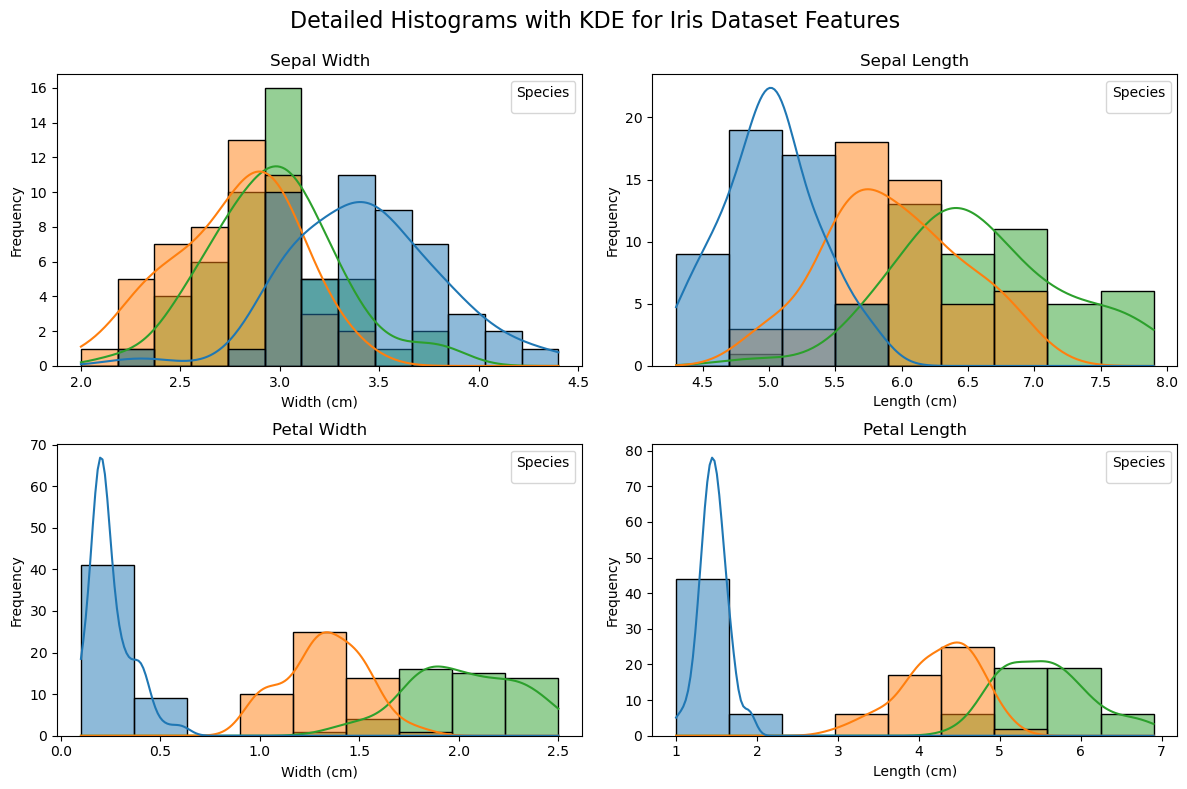

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Loading the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Renaming columns for easier access
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data['species'] = iris.target_names[iris.target]  # Add species names

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Detailed Histograms with KDE for Iris Dataset Features", fontsize=16)

plot_settings = {
    "SepalWidthCm": {"title": "Sepal Width", "xlabel": "Width (cm)"},
    "SepalLengthCm": {"title": "Sepal Length", "xlabel": "Length (cm)"},
    "PetalWidthCm": {"title": "Petal Width", "xlabel": "Width (cm)"},
    "PetalLengthCm": {"title": "Petal Length", "xlabel": "Length (cm)"}
}

# Loop through features and create histograms
for i, feature in enumerate(plot_settings.keys()):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Create detailed histogram with KDE
    sns.histplot(data=data, x=feature, hue='species', kde=True, ax=ax)
    
    # Set individual plot titles and labels
    ax.set_title(plot_settings[feature]["title"])
    ax.set_xlabel(plot_settings[feature]["xlabel"])
    ax.set_ylabel("Frequency")
    
    # Add legend outside the plot
    ax.legend(loc='upper right', title='Species')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top space to accommodate the title
plt.show()


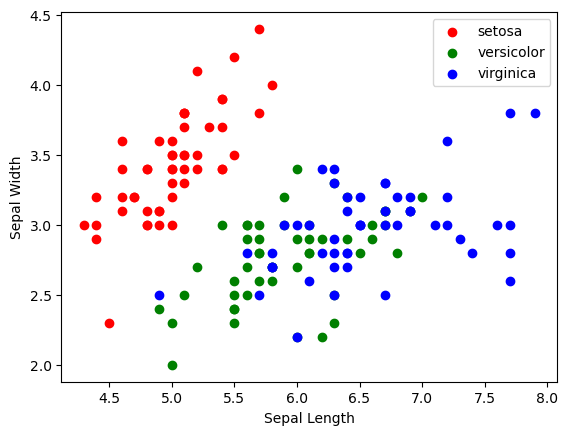

In [54]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Loading the Iris dataset
iris = load_iris()

# Creating the DataFrame and adding the 'Species' column
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Renaming columns for easier access
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# Define species and colors for the plot
species = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

# Create the scatter plot
for i in range(3):
    # Select data for the current species
    x = data[data['Species'] == species[i]]
    
    # Create a scatter plot for the current species
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels and legend
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# Display the scatter plot
plt.show()



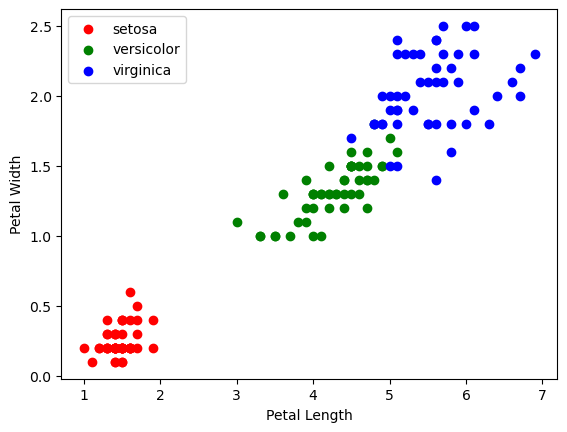

In [56]:

for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

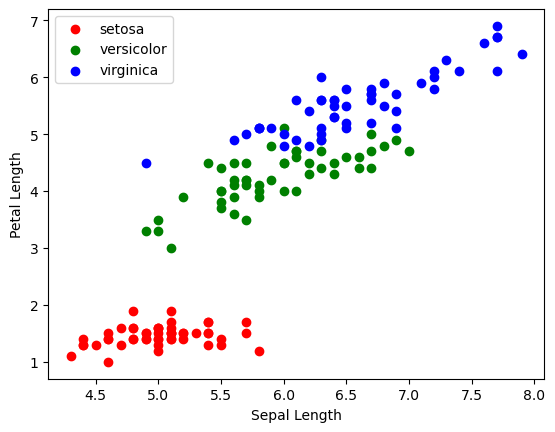

In [58]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

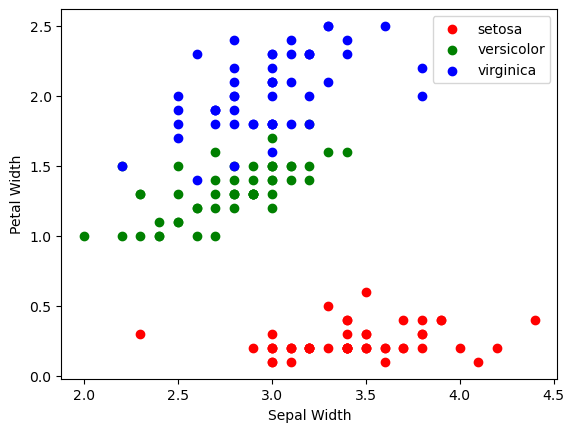

In [60]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()


In [62]:
data = data.dropna(subset=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
data.dtypes    


SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\HP\Documents\datascience\codesoft\IRIS.csv", encoding='ISO-8859-1')
numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()

     

In [15]:
encoded_data = pd.get_dummies(data)
corr_matrix = encoded_data.corr()

In [17]:
corr_matrix = data.corr(numeric_only=True)

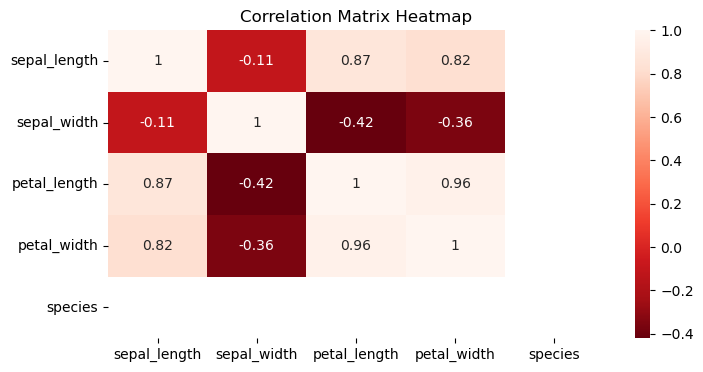

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert non-numeric values to NaN
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
corr_matrix = data_numeric.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix Heatmap')

# Display Chart
plt.show()

In [45]:
# Check if the data is loaded correctly and what columns are available
print(data.head())  # Print the first few rows of the DataFrame
print(data.columns)  # Print the column names


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [47]:
# Strip whitespace from column names if needed
data.columns = data.columns.str.strip()

# Alternatively, rename the column if needed
data = data.rename(columns={'species ': 'Species'})  # Replace 'species ' with actual column name


In [49]:
# Try matching columns case-insensitively and trimming spaces
print([col for col in data.columns if 'species' in col.lower()])


['species']


In [53]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to the correct column
data['species'] = le.fit_transform(data['species'])

# Check the unique values after encoding
unique_species = data['species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species)


Encoded Species Values:
[0 1 2]


In [57]:

from sklearn.model_selection import train_test_split

# Defining the X and y
X = data.drop(columns=['species'], axis=1)
y = data['species']

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Checking the distribution of the dependent variable in the training set
y_train.value_counts()


species
0    37
2    35
1    33
Name: count, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Defining the X and y
X = data.drop(columns=['species'], axis=1)
y = data['species']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initializing the RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the RandomForestClassifier model
RF.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [63]:
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

1.0
1.0


In [65]:
y_pred_rf=RF.predict(X_test)
y_pred_rf

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [67]:
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [69]:
df=pd.DataFrame({"y_pred_rf":y_pred_rf,"y_test":y_test})
df

,y_pred_rf,y_test
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1
